## Ford Go Bike Data Visualization

### Investigation Overview

Ford Go Bike data set includes information about rides in San Francisco Bay area. This data set consists of millions of information. For this investigation, Member gender, age, user type, bike share riding and duration time will be ued. 

### Dataset Overview

Ford Go Bike data set inclues following features: duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude	, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type. member_birth_year, member_gender, bike_share_for_all_trip. 
There are total of 16 columns and 106718 rows of values. 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import requests
import os
import zipfile
from sklearn.cluster import KMeans
%matplotlib inline

In [14]:
df = pd.read_csv('201802-fordgobike-tripdata-2.csv')

In [15]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [16]:
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].astype('category')

In [17]:
df = df.dropna(how='any',axis=0) 

In [18]:
# Refered from https://github.com/saiogirala/Ford_Bike_Communicating_Findings/blob/master/Exploratory_Data_Analysis.ipynb
df['member_age'] = 2020-df['member_birth_year']

In [19]:
df['start_station_id'] = df['start_station_id'].astype('int')
df['end_station_id'] = df['end_station_id'].astype('int')
df['member_birth_year'] = df['member_birth_year'].astype('int')
df['member_age'] = df['member_age'].astype('int')
df['bike_id'] = pd.to_numeric(df['bike_id'])

In [20]:
df = df.query('duration_sec <= 2000')

In [21]:
df['st_month_name']=df['start_time'].dt.strftime('%B')

In [22]:
df['st_week_name']=df['start_time'].dt.strftime('%a')

In [23]:
df['duration_min'] = df['duration_sec']/60

## Univariate Exploration
### #1 How many people share bike ride?

In order to do this research, we need to use bike_share_for_all_trip columns. 

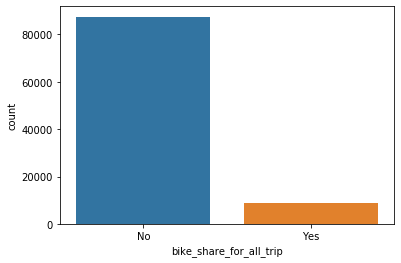

In [24]:
sb.countplot(data = df, x = 'bike_share_for_all_trip');

Above graph demonstrates overall quantity of "Yes" and "No" in bike_share_for_all_trip column

In [25]:
# Numbers are saved in order to do the appropriate proportion. 
exp_val = [89145,9481]
exp_label = ["No", "Yes"]

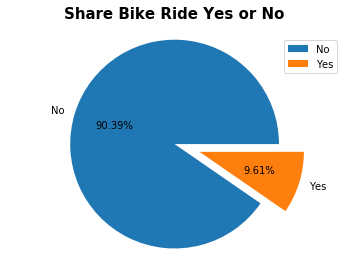

In [26]:
plt.axis("equal")
plt.title('Share Bike Ride Yes or No', fontsize=15, y=1.05, fontweight='semibold')
plt.pie(exp_val,labels=exp_label,radius=1.2,autopct='%0.2f%%',explode=[0,0.3], )
plt.legend(('No','Yes'));

This graph demonstrates over all proportion of "Yes" and "No" from entire population. 

Observation:
> In the pie chart, I convey the result of my research on "How many people share bike ride?". This graph demonstrate people who shares the bike ride and who doesn't share the bike riding in percentage. According to the data and more clearly on the vidualization, Definetly "No" is from majority of the people. As a result of this, we figured that majority (90.39%) of people did not share the bike ride.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?¶

I presented my distribution on pie chart because it represents the whole proportion of the population and they divided into two pieces. So it is much easier to interpret the porportion of Yes and No. I expected this same result so there weren't any unsual points. I predicted that more bike rider do not share their bike because they rented for their own use. For this visualization i used two set of graph. First basic bar graph is to show general overall quantity of each values and second pie chart is for proportion of each values. This tranformaiton into our visulization will help viewers understand the data and multiple aspects. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?¶

I used the explode function to put some pad between two values to make distinctive and easier to view. I've also used autopct function to round the decimal to the hundredths places to fit the number into pie. 

## Bivariate Exploration
### #2 How long did the different gender group ride a bike? (Duration (sec) vs Member gender)

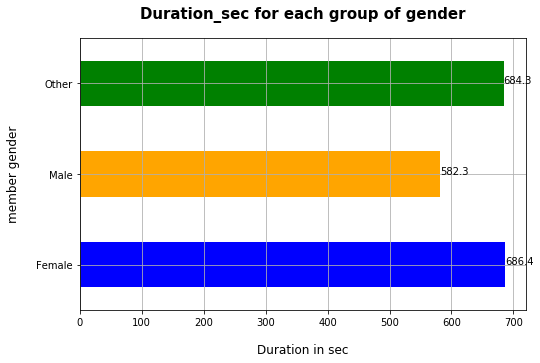

In [27]:
new_color = ['blue', 'orange', 'green']
ax = df.groupby('member_gender')['duration_sec'].mean().plot(kind='barh', color=new_color, figsize=(8,5))
plt.title('Duration_sec for each group of gender', fontsize=15, y=1.05, fontweight='semibold')
plt.ylabel('member gender', labelpad=16,  fontsize=12)
plt.xlabel('Duration in sec', labelpad=16,  fontsize=12)
plt.xticks(rotation=360)
plt.grid()
# To view the actual values for each group
[ax.text(v, i, '{:.1f}'.format(v)) for i, v in enumerate(df.groupby(['member_gender'])['duration_sec'].mean())];

I used bar graph and label it with it's value since difference between other and female is so minor.

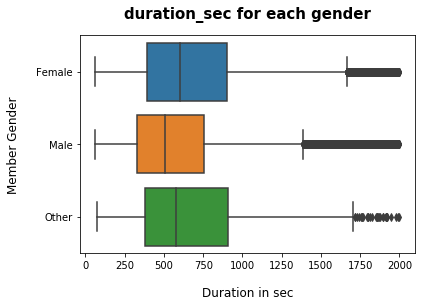

In [28]:
sb.boxplot(x='duration_sec', y='member_gender', data=df)
plt.title('duration_sec for each gender', fontsize=15, y=1.05, fontweight='semibold')
plt.ylabel('Member Gender', labelpad=16,  fontsize=12)
plt.xlabel('Duration in sec', labelpad=16,  fontsize=12);

Box plot demonstrates overall average in different aspects. Compare to bar graph, this graph helps us to interpret better on outliers on female and other gender. female gender have more outlier then other gender group.

Observation:
>In these Bar and box plot, I displayed how each group of gender have different duration in sec. As you can see from the graph, male gender holds lowest average duration sec compared to other two genders. However, it was diffcult to compare female and other gender average duration in sec. So I placed numeric value of on top of each bars in the graph. In a slight difference (2.1) female group had highest duration_sec in average. In addition to this, I also made a visualization of box plot that displays min, max median, Q1 and Q3. What I noticed from this box plot is that male group had significantly low max rate compared to other two gender group and overall lower median, Q1 and Q3. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?¶

I observed that female and other gender had pretty similar mean duration seconds. In order to compare which has more duration second, I implimented value label on box graph. As a result of that I figured out that female gender had 2.1 seconds more mean duration in second then other gender. This is very slight difference so it was impossible to notice on the visualization. On the other hand, male had comparatively lower mean duration in second compared to other two genders. This is distictive on both graphs. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?¶

Since this graph was relationship between qualitative values vs. quantitative values there weren't direct correation between two features. However we can make an assumption that as mean duration in sec increases female and other gender increases faster rate then male gender. 

## Multivariate Exploration
### #3 How is each user type's duration in min in every day of the week? 
### (User type VS Start week name VS duration in min)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


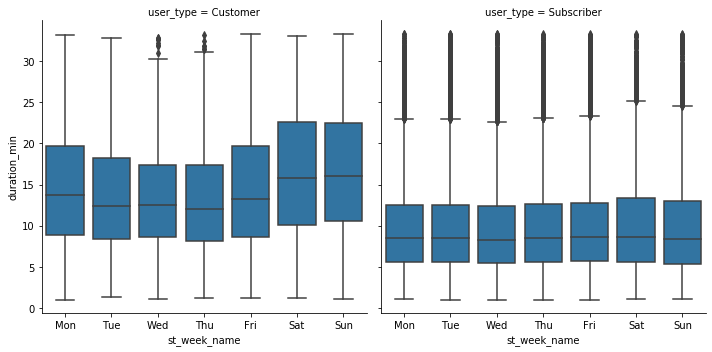

In [30]:
g = sb.FacetGrid(data = df, col = 'user_type', size = 5)
g.map(sb.boxplot, 'st_week_name', 'duration_min')
# To display day of the week in order
df.st_week_name= pd.Categorical(df.st_week_name, categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

I have displayed two spaces for usertype. One for customer and other for substriber. 

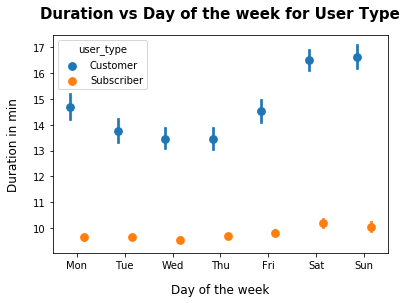

In [31]:
sb.pointplot(data=df, x='st_week_name', y='duration_min', hue='user_type', dodge=0.3, linestyles='')
plt.title('Duration vs Day of the week for User Type', fontsize=15, y=1.05, fontweight='semibold')
plt.xlabel('Day of the week', labelpad=13, fontsize=12)
plt.ylabel('Duration in min', labelpad=13, fontsize=12)
df.st_week_name= pd.Categorical(df.st_week_name, categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

Pointplot shows the flow of duration in min for each week very clearly. 

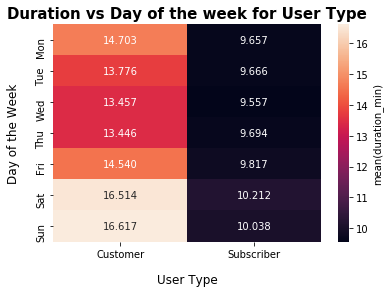

In [32]:
df2 = df.groupby(['user_type', 'st_week_name']).mean()['duration_min']
df2 = df2.reset_index(name = 'duration_min_avg')
df2 = df2.pivot(index = 'st_week_name', columns = 'user_type',
                            values = 'duration_min_avg')
sb.heatmap(df2, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_min)'});
plt.title('Duration vs Day of the week for User Type', fontsize=15, fontweight='semibold')
plt.ylabel('Day of the Week', labelpad=16,  fontsize=12)
plt.xlabel('User Type', labelpad=14,  fontsize=12)
df.st_week_name= pd.Categorical(df.st_week_name, categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

Color palette displays differences between customer and subscriber by color. 

Observation:
>I made a research on how each user type's duration in min varies in each day of the week. In order to conclude this result more precise, I displayed three visualizations. You can see overall distinctions between customer's and subscriber's differenciate from all three graphs. I laid the day of the week in order to make is easier to interpret to the audiance. As you can see on the first box plot, even with the glance, you can cleary conclude that user type cusomter's duration in min is relatively higher then user type subscriber's duration in min. You can also see that on Saturday and Sunday presents relatively higher average duration in min compare to other day of the week. Same asect showed on second visulization. For the last visualization, I used color palette to present. The color on the graph represent the mean of duration in min. As they have darker the color it means the lower the duration in min. As you can see, subscriber repersent much darker color then customer. Like other two graph, this last graph presents relatively higher average duratin in min on Sunday and Saturday compared to other day of the week. 

>As a result of this research, we can conclude that average duration in custmomer is much higher then average duration in subscriber. Especially on Saturday and Sunday presents much higher average duration in min compared to other day of the week. However, subscriber's day of the week is hard to differenciate due to their minor changes in each day. However, on point plot, we can tell that Saturday and Sunday represent higher then other day of the week.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?¶

As I mentioned in the observation above, I found that customer's duration in min is much higher then duration for subscribers. I have used color palette and pointplot to disticnt the differences between each relation much easier and faster. This color distinction was helpful in many ways. This function helps audience to interpret the graph and flow at a glance. 

### Were there any interesting or surprising interactions between features?¶

I was expecting more mean duration time during weekends because people can spend more time on bike riding. Howeer, It was little surprising to see huge difference between customer and subscriber mean duration time. Including weekdays and weekends there were substantial gap between customer's and subscriber's mean duration time. 

## Reference

https://datatofish.com/string-to-integer-dataframe/ 

https://www.youtube.com/watch?v=GOuUGWGUT14 


In [33]:
!jupyter nbconvert Communication-Data.ipynb --to slides --template output-toggle.tpl --post serve

[NbConvertApp] WARNING | pattern 'Communication-Data.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--stdout
    Write notebook output t